# Using the BucketingProcess

In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from skorecard import datasets
from skorecard.bucketers import DecisionTreeBucketer, OptimalBucketer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


In [3]:
from skorecard import datasets
from skorecard.bucketers import DecisionTreeBucketer, OptimalBucketer
from skorecard.pipeline import BucketingProcess

df = datasets.load_uci_credit_card(as_frame=True)
y = df["default"]
X = df.drop(columns=["default"])

num_cols = ["LIMIT_BAL", "BILL_AMT1"]
cat_cols = ["EDUCATION", "MARRIAGE"]

bucketing_process = BucketingProcess()#specials={'LIMIT_BAL': {'=400000.0' : [400000.0]}})
bucketing_process.register_prebucketing_pipeline(
                            DecisionTreeBucketer(variables=num_cols, max_n_bins=100, min_bin_size=0.05),
                            DecisionTreeBucketer(variables=cat_cols, max_n_bins=100, min_bin_size=0.05)
)
bucketing_process.register_bucketing_pipeline(
        OptimalBucketer(variables=num_cols, max_n_bins=10, min_bin_size=0.05),
        OptimalBucketer(variables=cat_cols,
                        variables_type='categorical',
                        max_n_bins=10,
                        min_bin_size=0.05),
)

bucketing_process.fit(X, y)

BucketingProcess()

In [4]:
bucketing_process.prebucket_table("LIMIT_BAL")

,pre-bucket,label,Count,Count (%),Non-event,Event,Event Rate,WoE,IV,bucket
0,0,"(-inf, 25000.0)",479.0,7.98,300.0,179.0,37.37,0.73,0.05,0
1,1,"[25000.0, 45000.0)",370.0,6.17,233.0,137.0,37.03,0.71,0.04,1
2,2,"[45000.0, 55000.0)",676.0,11.27,518.0,158.0,23.37,0.05,0.00,2
3,3,"[55000.0, 75000.0)",336.0,5.60,233.0,103.0,30.65,0.43,0.01,2
4,4,"[75000.0, 85000.0)",319.0,5.32,243.0,76.0,23.82,0.08,0.00,3
5,5,"[85000.0, 105000.0)",330.0,5.50,241.0,89.0,26.97,0.25,0.00,3
6,6,"[105000.0, 145000.0)",566.0,9.43,436.0,130.0,22.97,0.03,0.00,4
7,7,"[145000.0, 175000.0)",449.0,7.48,380.0,69.0,15.37,-0.46,0.01,5
8,8,"[175000.0, 225000.0)",769.0,12.82,630.0,139.0,18.08,-0.27,0.01,5
9,9,"[225000.0, 275000.0)",501.0,8.35,419.0,82.0,16.37,-0.39,0.01,6


In [5]:
bucketing_process.prebucket_table("EDUCATION")

,pre-bucket,label,Count,Count (%),Non-event,Event,Event Rate,WoE,IV,bucket
0,0,"(-inf, 1.5)",2187.0,36.45,1790.0,397.0,18.15,-0.26,0.02,0
1,1,"[1.5, 2.5)",2725.0,45.42,2037.0,688.0,25.25,0.16,0.01,2
2,2,"[2.5, inf)",1088.0,18.13,828.0,260.0,23.90,0.08,0.00,1
3,3,Missing,0.0,0.00,0.0,0.0,NaN,0.00,0.00,3


In [6]:
bucketing_process.prebucket_table("MARRIAGE")

,pre-bucket,label,Count,Count (%),Non-event,Event,Event Rate,WoE,IV,bucket
0,0,"(-inf, 1.5)",2798.0,46.63,2120.0,678.0,24.23,0.10,0.0,1
1,1,"[1.5, inf)",3202.0,53.37,2535.0,667.0,20.83,-0.09,0.0,0
2,2,Missing,0.0,0.00,0.0,0.0,NaN,0.00,0.0,2


In [7]:
bucketing_process.prebucket_table("LIMIT_BAL")

,pre-bucket,label,Count,Count (%),Non-event,Event,Event Rate,WoE,IV,bucket
0,0,"(-inf, 25000.0)",479.0,7.98,300.0,179.0,3737.0,0.73,0.05,0
1,1,"[25000.0, 45000.0)",370.0,6.17,233.0,137.0,3703.0,0.71,0.04,1
2,2,"[45000.0, 55000.0)",676.0,11.27,518.0,158.0,2337.0,0.05,0.00,2
3,3,"[55000.0, 75000.0)",336.0,5.60,233.0,103.0,3065.0,0.43,0.01,2
4,4,"[75000.0, 85000.0)",319.0,5.32,243.0,76.0,2382.0,0.08,0.00,3
5,5,"[85000.0, 105000.0)",330.0,5.50,241.0,89.0,2697.0,0.25,0.00,3
6,6,"[105000.0, 145000.0)",566.0,9.43,436.0,130.0,2297.0,0.03,0.00,4
7,7,"[145000.0, 175000.0)",449.0,7.48,380.0,69.0,1537.0,-0.46,0.01,5
8,8,"[175000.0, 225000.0)",769.0,12.82,630.0,139.0,1808.0,-0.27,0.01,5
9,9,"[225000.0, 275000.0)",501.0,8.35,419.0,82.0,1637.0,-0.39,0.01,6


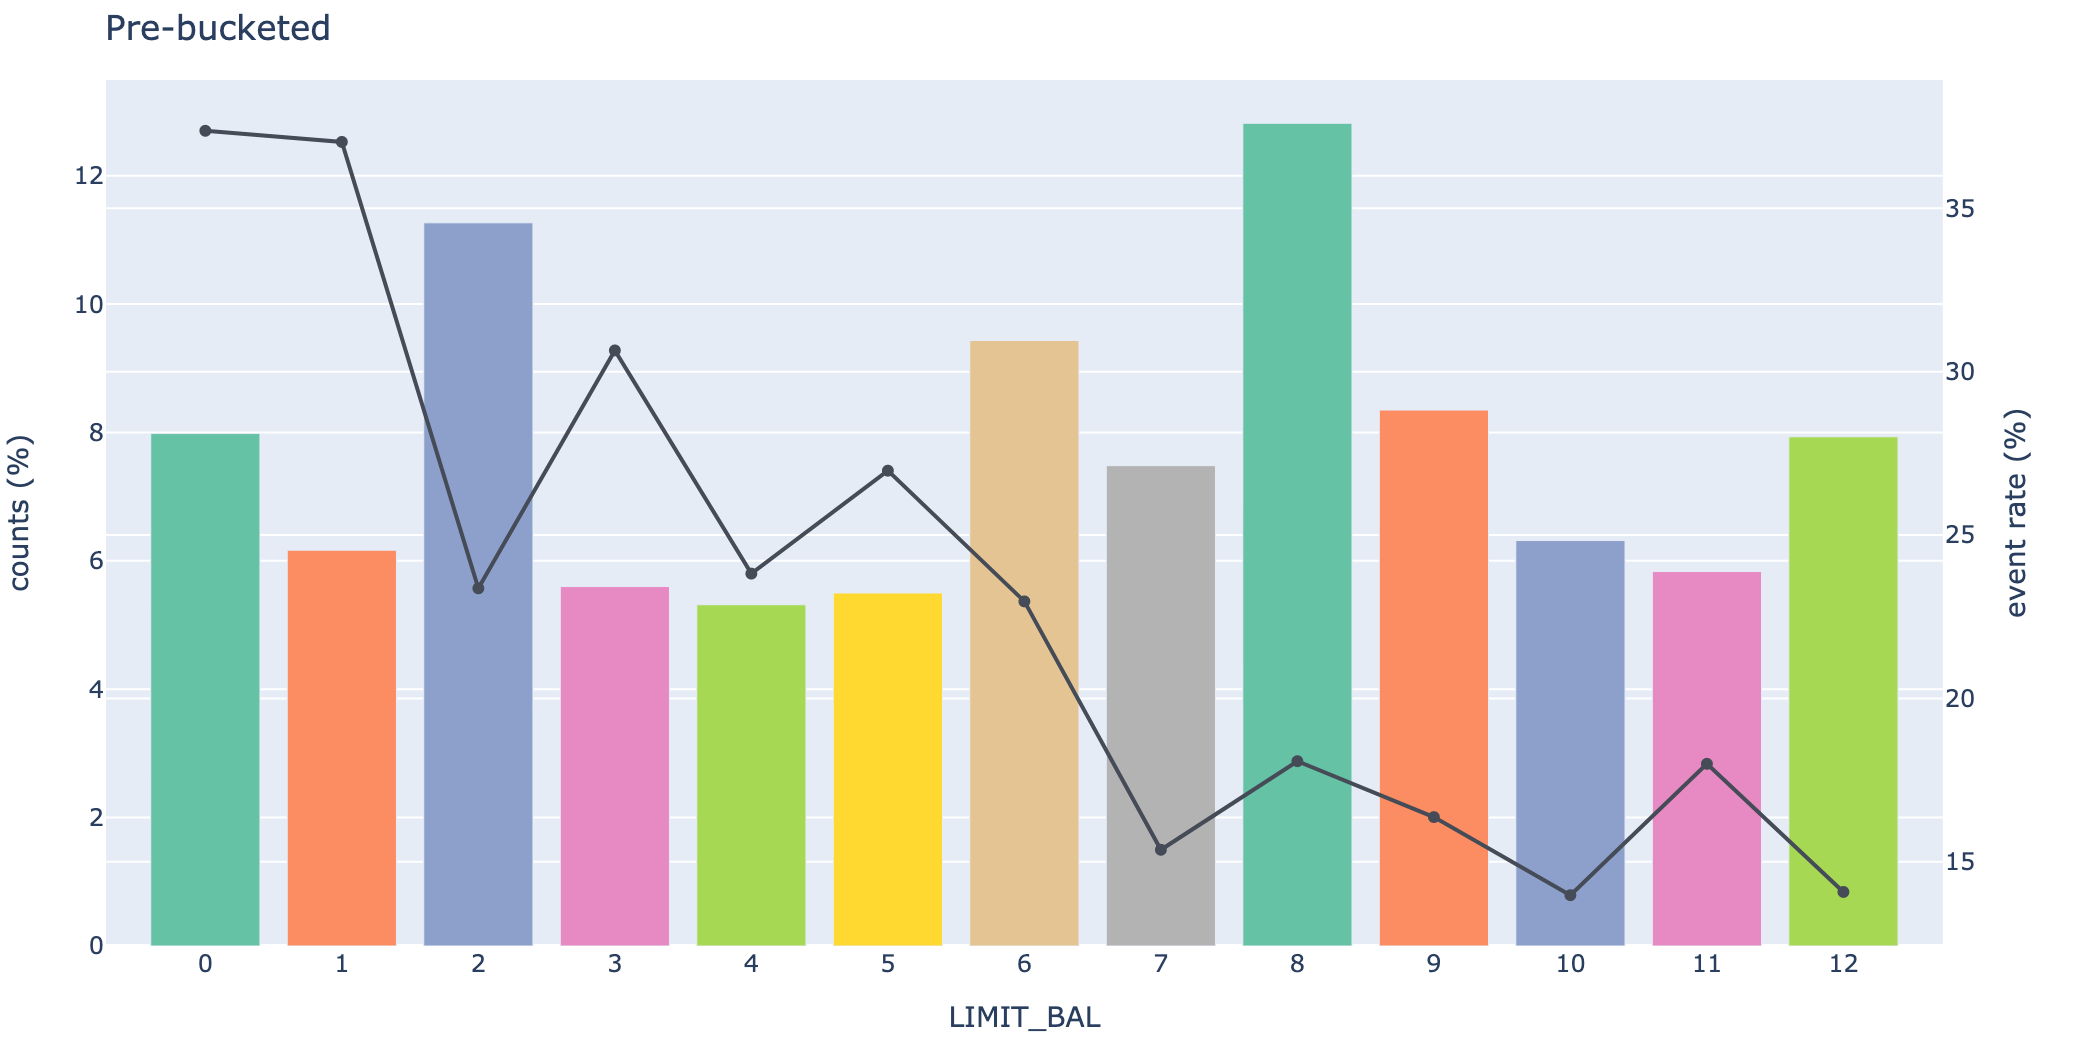

In [9]:
bucketing_process.plot_prebucket("LIMIT_BAL", format="png", scale=2, width=1050, height=525)

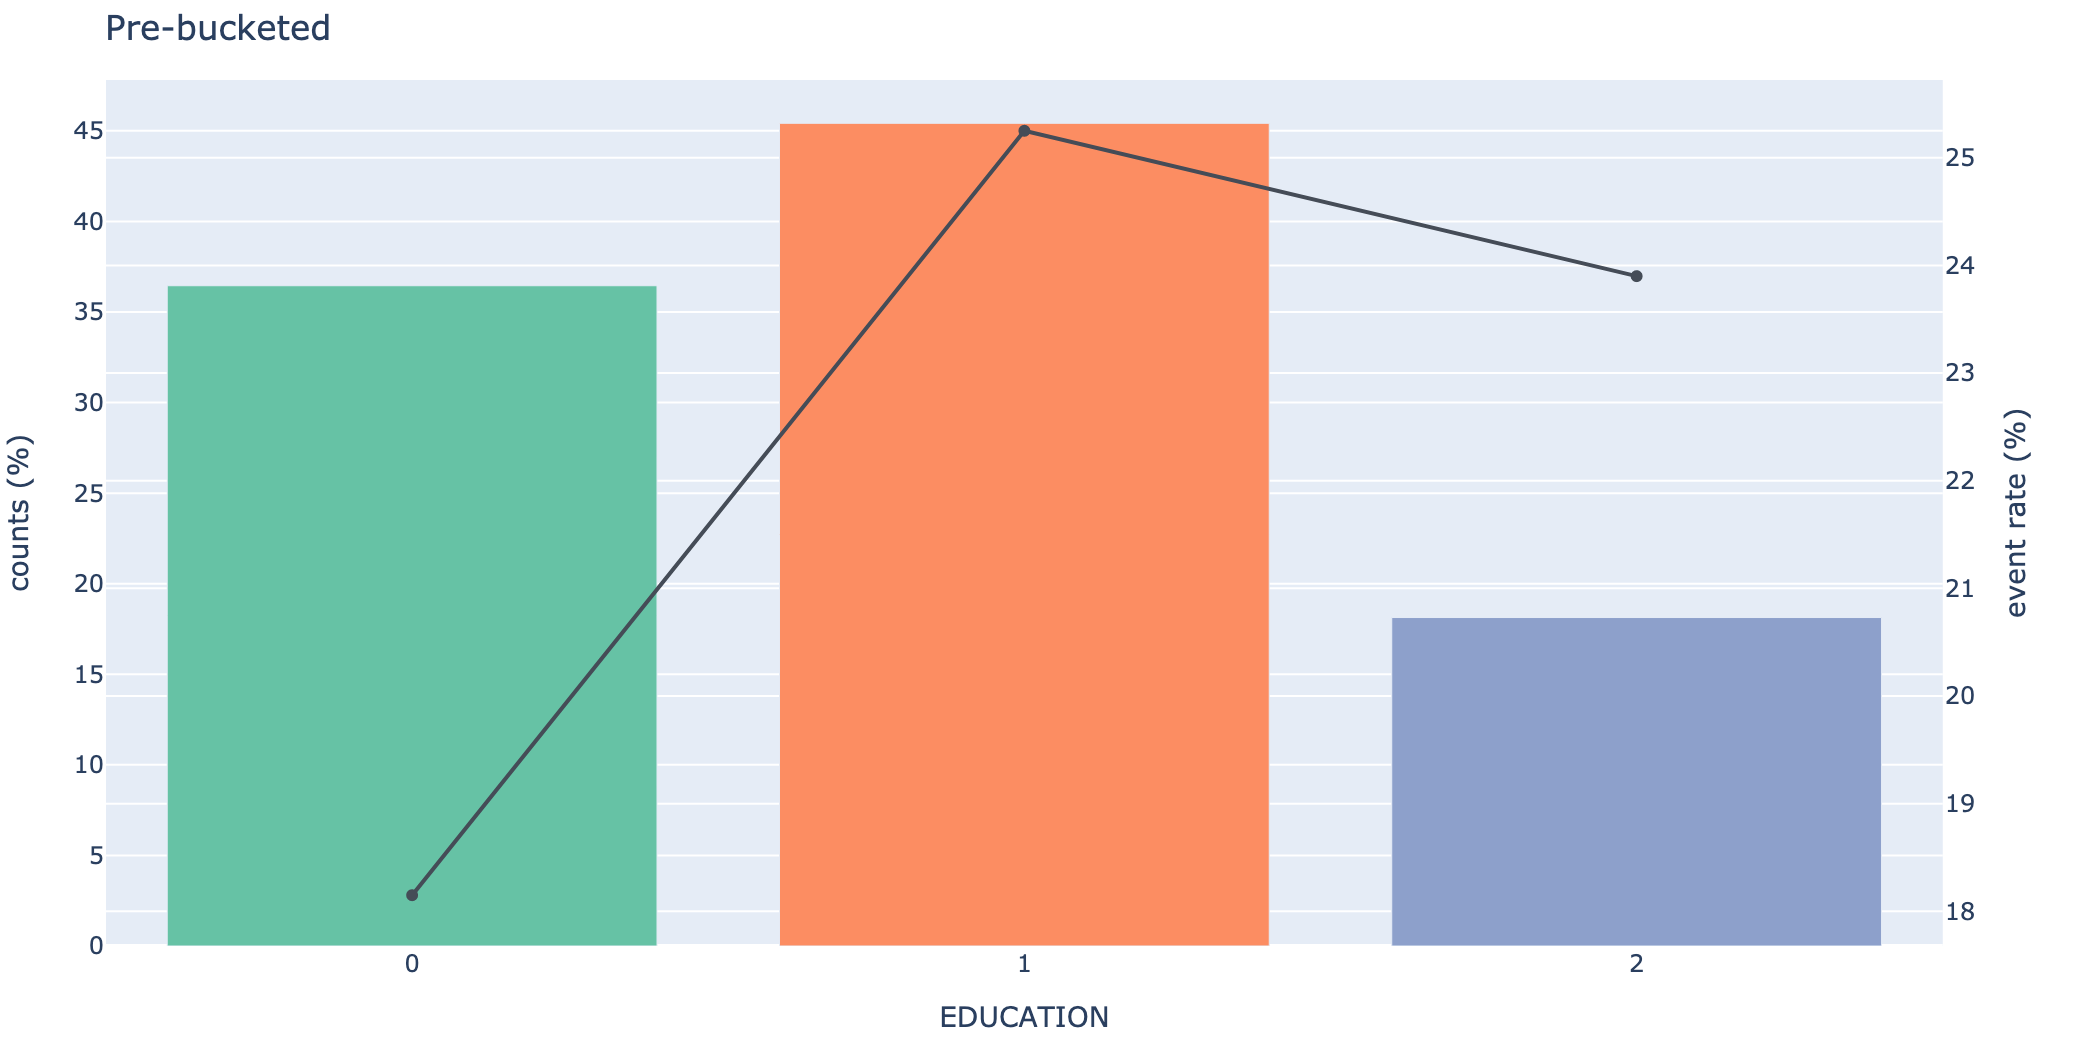

In [10]:
bucketing_process.plot_prebucket("EDUCATION", format="png", scale=2, width=1050, height=525)

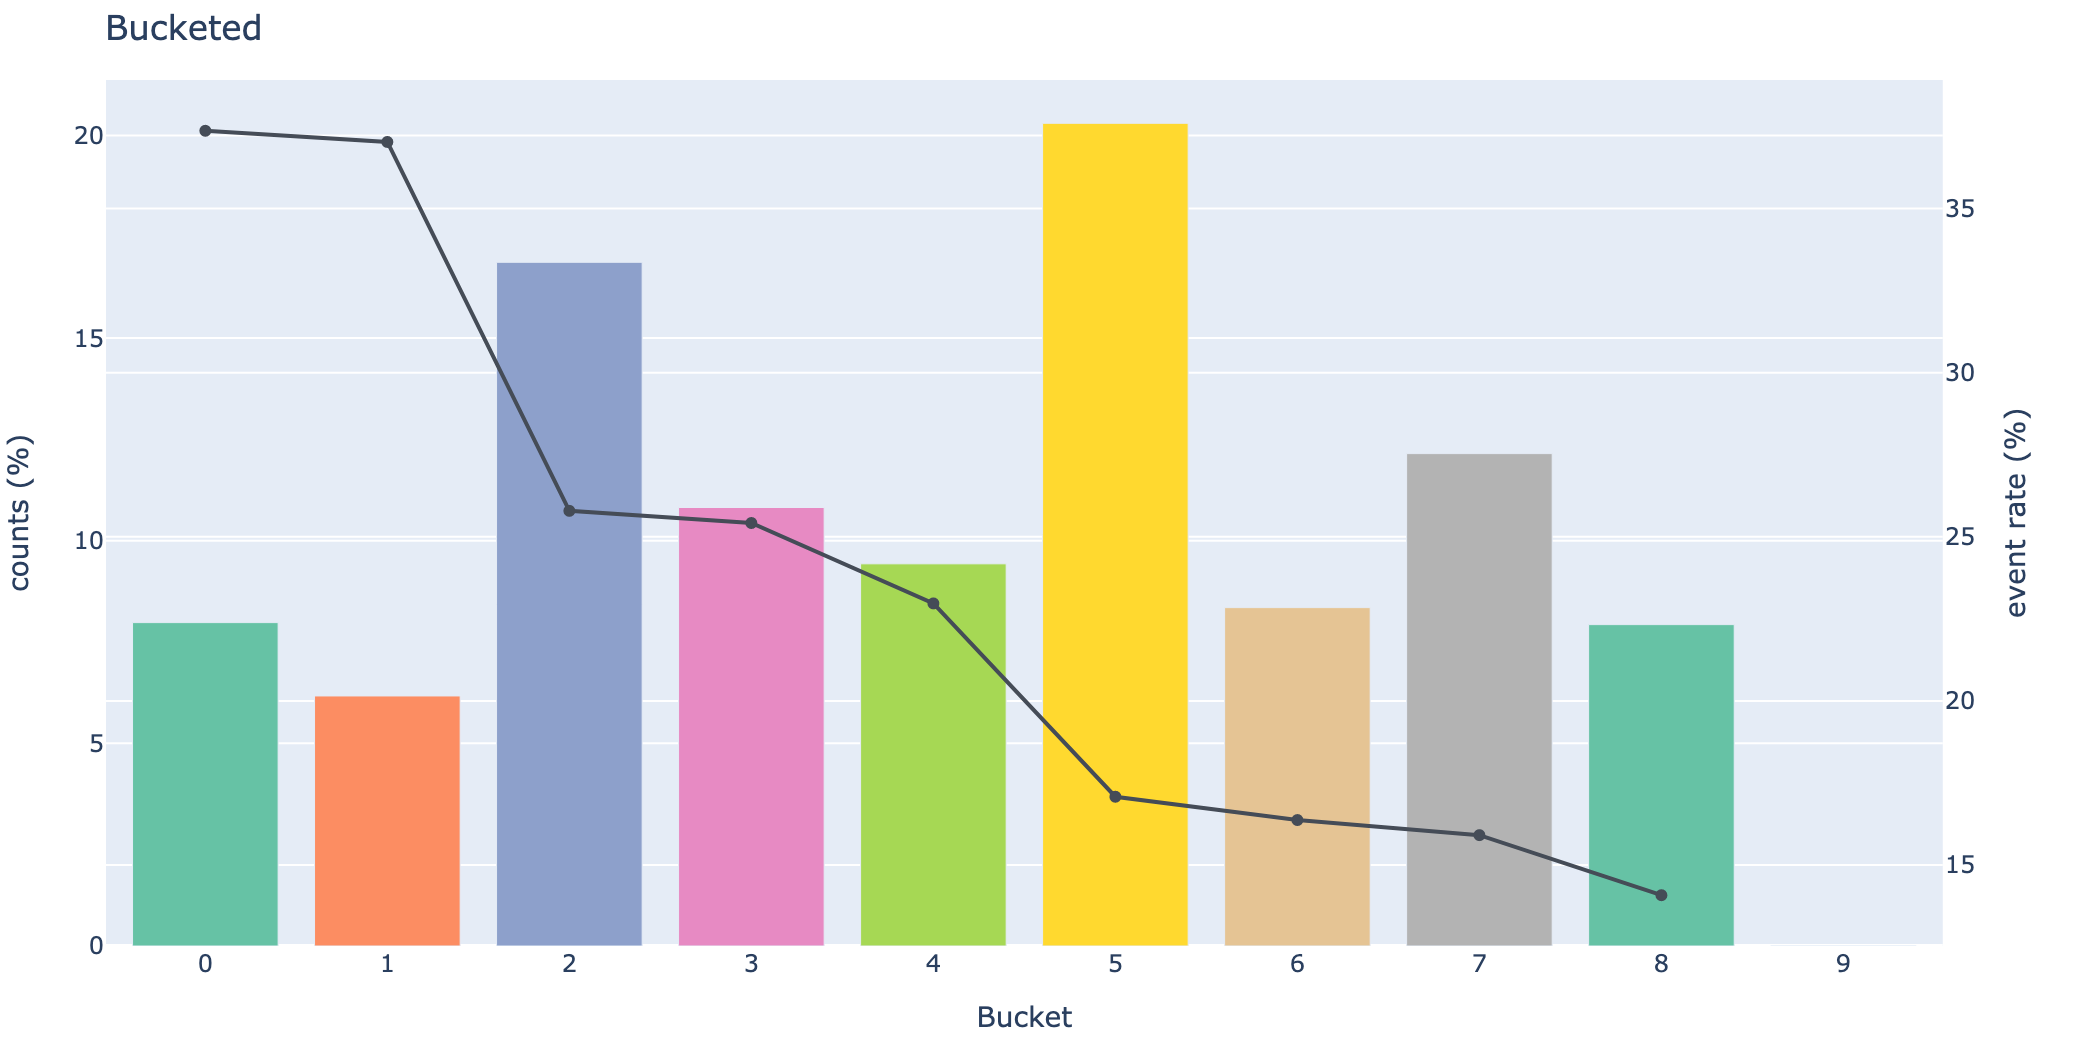

In [11]:
bucketing_process.plot_bucket("LIMIT_BAL",format="png", scale=2, width=1050, height=525)

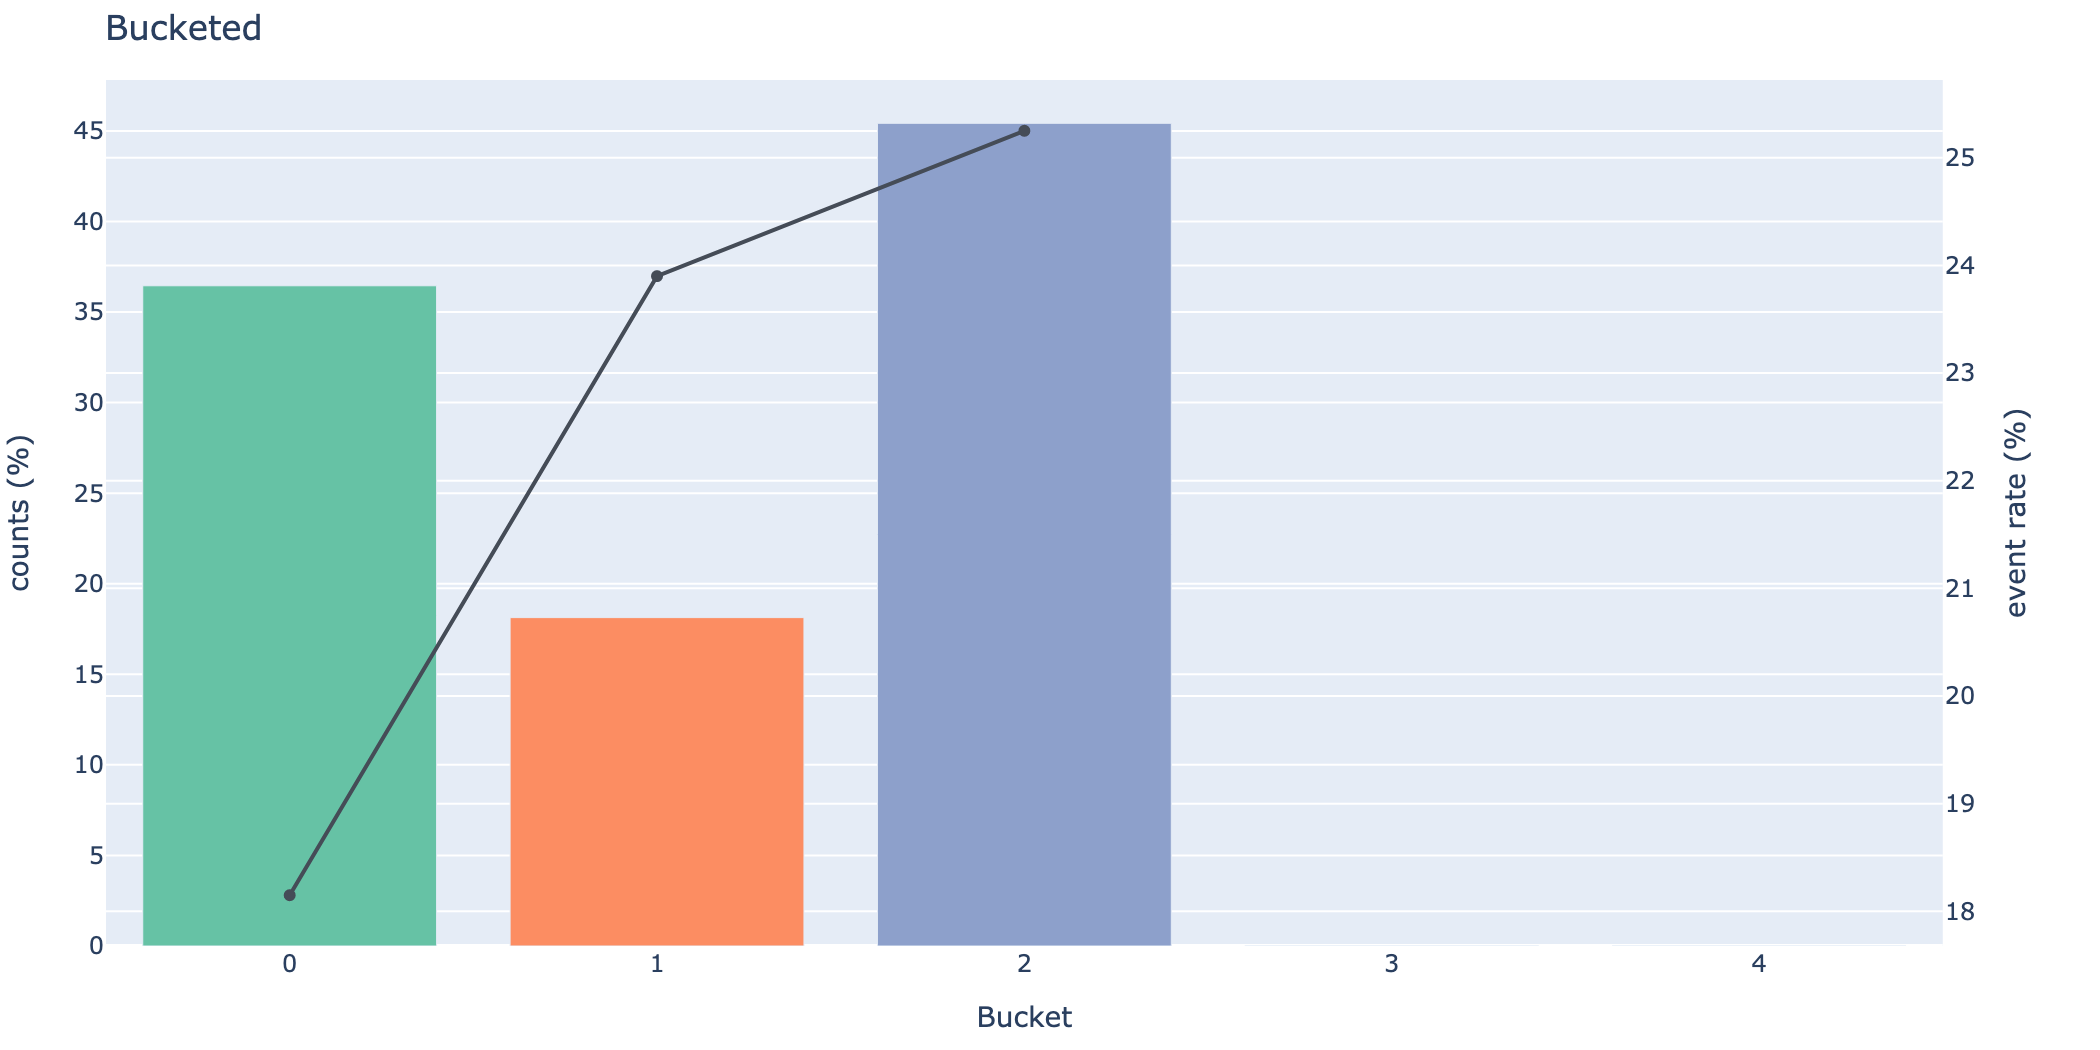

In [12]:
bucketing_process.plot_bucket("EDUCATION", format="png", scale=2, width=1050, height=525)

In [12]:
# pipeline = make_pipeline(
#     bucketing_process,
#     OneHotEncoder(),
#     LogisticRegression(),
# )
# pipeline.fit(X[num_cols], y)

In [ ]:
# from skorecard.apps import BucketTweakerApp
# tweaker = BucketTweakerApp(pipeline, X[num_cols], y)

# # Three modes to try: ['inline','external', 'jupyterlab']
# # https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e
# tweaker.run_server(mode='external', port=8051)
# # tweaker.stop_server()